In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 
          'max_depth': [i for i in range(1,11)], 
          'max_leaf_nodes': [5,10,15,20,25]}
dec_tree = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dec_tree, params, cv=Kcv)

In [4]:
#best params found by grid search
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 25,
 'splitter': 'best'}

In [5]:
%%time
dec_tree.set_params(**grid_search_cv.best_params_)
dec_tree.fit(X_train,y_train)
pred = dec_tree.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.48429301032130306, recall: 0.24812030075187969, f1score: 0.2766810033223088
CPU times: user 148 ms, sys: 1.28 ms, total: 149 ms
Wall time: 148 ms


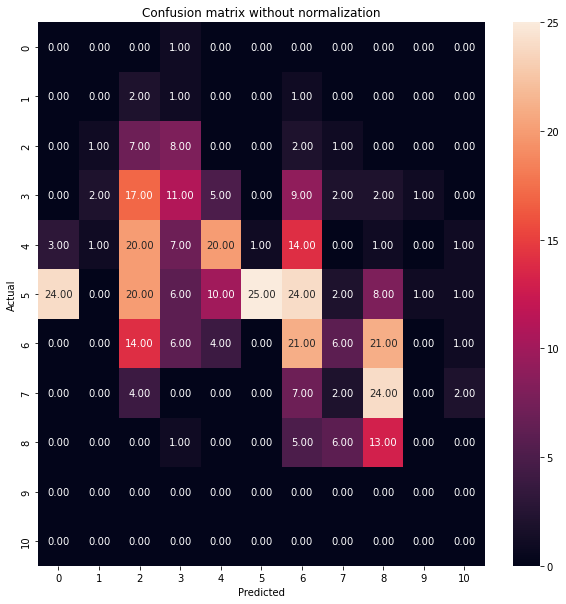

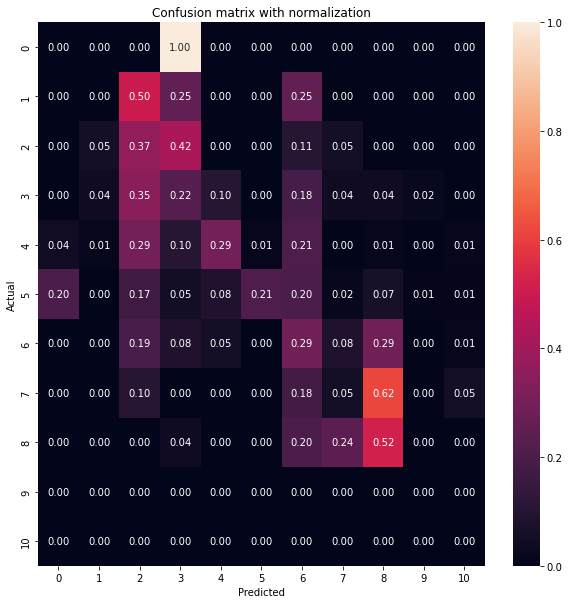

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

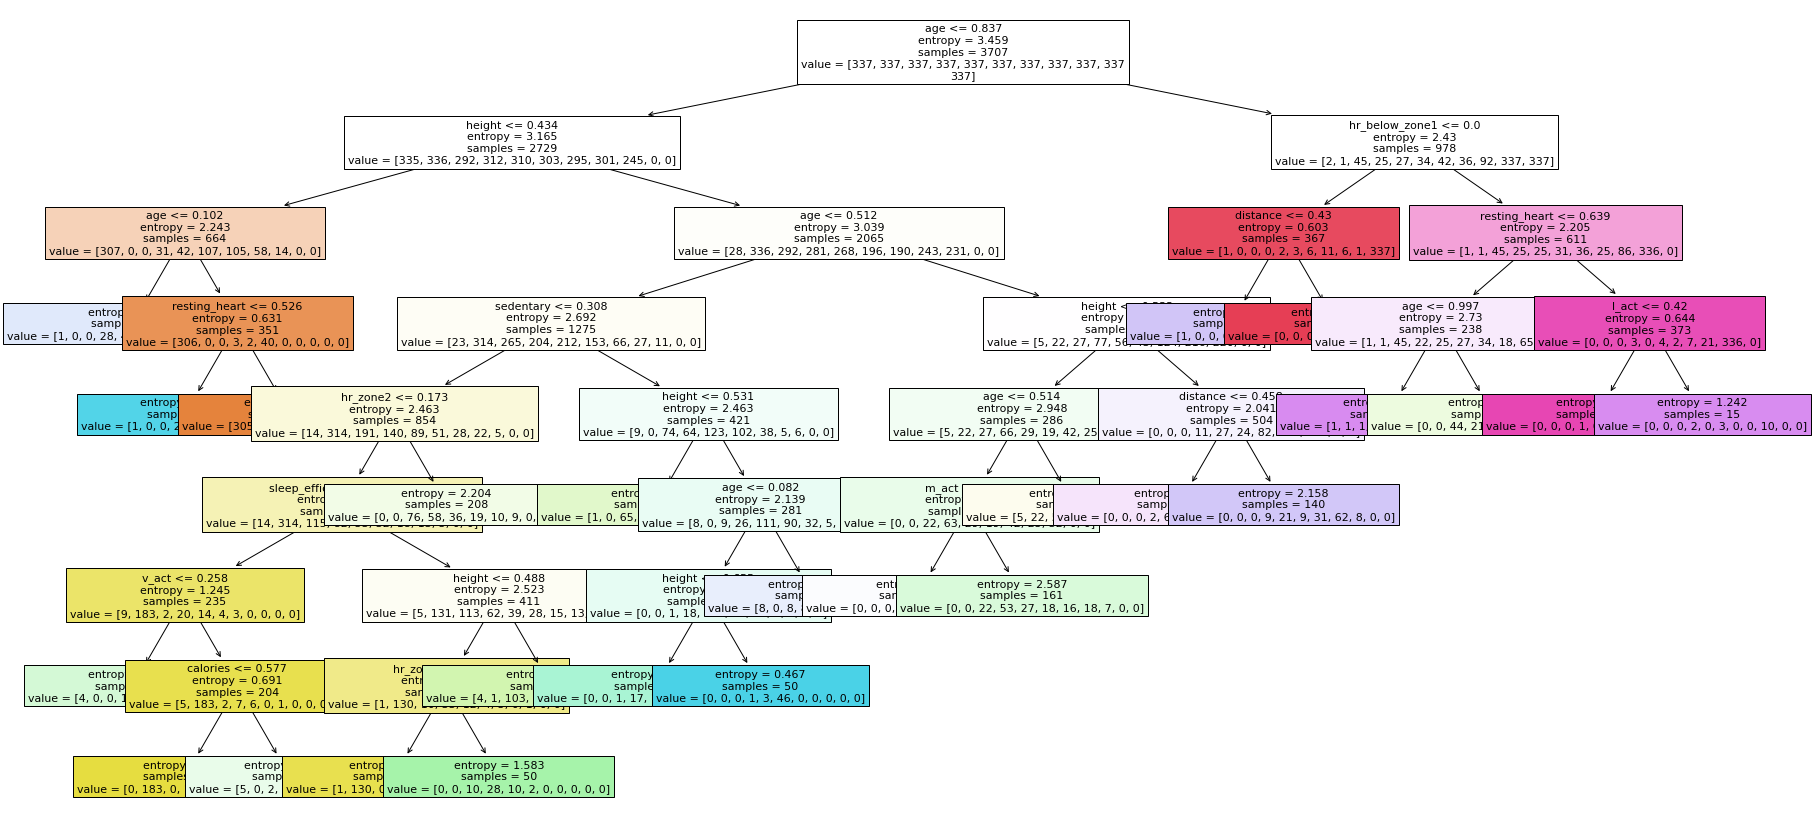

In [7]:
from sklearn import tree

plt.figure(figsize=(30,15))

tree.plot_tree(dec_tree,
              feature_names=X_train.columns,
              filled=True,
              fontsize=11)
plt.show()

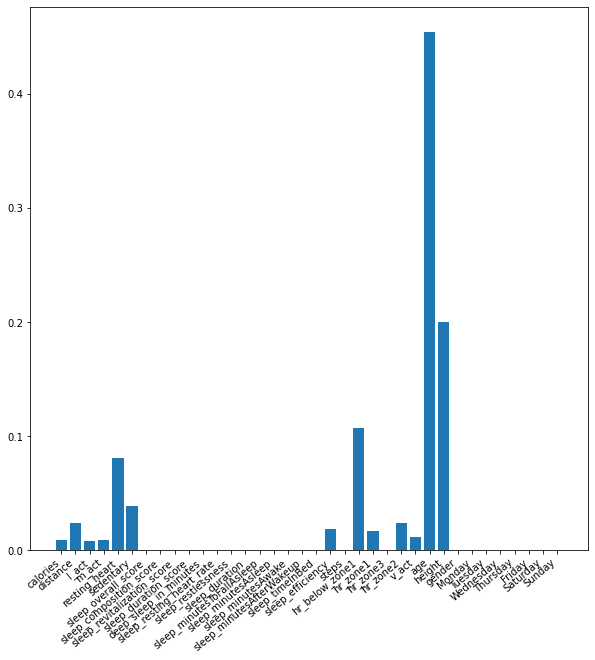

In [8]:
importance = dec_tree.feature_importances_

fig = plt.figure(figsize=(10,10))
plt.bar(X_test.columns, importance)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [9]:
print('training data')
print(classification_report(y_train, dec_tree.predict(X_train)))

print('test data')
print(classification_report(y_test, dec_tree.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       337
         1.0       0.86      0.99      0.92       337
         2.0       0.41      0.85      0.55       337
         3.0       0.39      0.30      0.34       337
         4.0       0.56      0.30      0.39       337
         5.0       0.90      0.24      0.38       337
         6.0       0.33      0.43      0.37       337
         7.0       0.44      0.21      0.29       337
         8.0       0.49      0.69      0.58       337
         9.0       0.94      1.00      0.97       337
        10.0       0.97      1.00      0.99       337

    accuracy                           0.63      3707
   macro avg       0.66      0.63      0.61      3707
weighted avg       0.66      0.63      0.61      3707

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
